<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Gr%C3%A1ficasDeSeriesDeFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

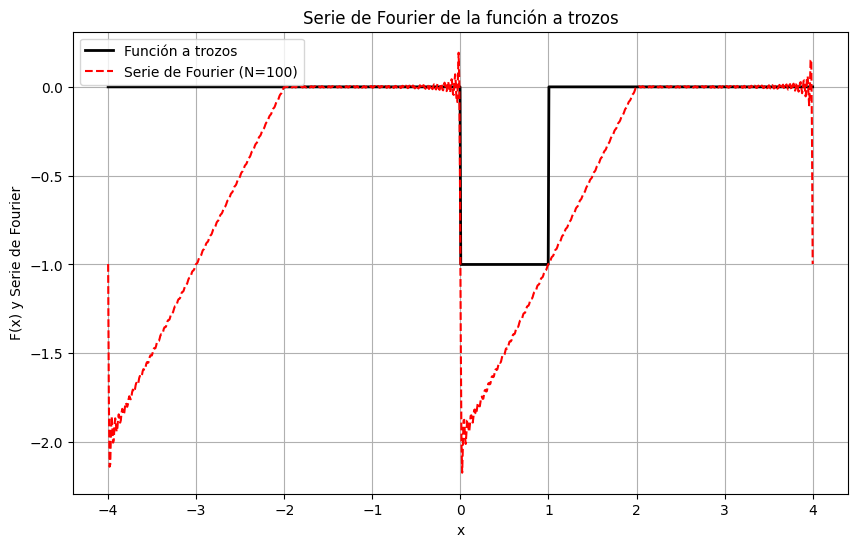

In [5]:
# Ledezma Garcilazo Isaac Israel.

import numpy as np
import matplotlib.pyplot as plt

# En esta línea definimos la función a trozos mediante ciclo if (debido a que por alguna extraña razón no quiso funcionar con la función np.piecewise)
def F(x):
    if -2 <= x < 0:
        return 0
    elif 0 <= x <= 2:
        return x - 2
    else:
        return 0

# Aqui ajustamos el periodo de la función y la cantida de armonicos de la serie de Fourier
L = 2  # Periodo de la función
N = 100  # Armonicos
# Aqui se ajustan los puntos que más adelante se graficarán.
x_vals = np.linspace(-2 * L, 2 * L, 1000)  # Puntos para graficar
y_vals = np.vectorize(F)(x_vals)  # Evaluar la función en los puntos

# Esta función define la fórmula para calcular los coeficientes de la serie de  Fourier.
def fourier_series(x, N, L):
    a0 = (1 / (2 * L)) * np.trapz([F(xi) for xi in x], x)  # Cálculo del coeficiente a0
    series = a0
    # Ya calculados los coeficientes, se iteran los coeficientes con la sumatoria de la serie de Fourier mediante el ciclo for siguiente:
    for n in range(1, N+1):
        an = (1 / L) * np.trapz([F(xi) * np.cos(n * np.pi * xi / L) for xi in x], x)  # Cálculo del coeficiente an
        bn = (1 / L) * np.trapz([F(xi) * np.sin(n * np.pi * xi / L) for xi in x], x)  # Cálculo del coeficiente bn
        series += an * np.cos(n * np.pi * x / L) + bn * np.sin(n * np.pi * x / L)
    return series

# Esta variable guarda cada uno de los resultados de las iteraciones para posteriormente ser usada en la sección de graficación (llamemosle (1) ):
fourier_vals = fourier_series(x_vals, N, L)

# Por último, graficamos la función en comparativa a su serie de Fourier:
plt.figure(figsize=(10, 6))
# La siguiente línea grafica la función:
plt.plot(x_vals, y_vals, label='Función a trozos', color='black', lw=2)
# La siguiente línea grafica llos valores de la serie de Fourier (1).
plt.plot(x_vals, fourier_vals, label=f'Serie de Fourier (N={N})', color='red', linestyle='--')
plt.title('Serie de Fourier de la función a trozos')
plt.xlabel('x')
plt.ylabel('F(x) y Serie de Fourier')
plt.legend()
plt.grid(True)
plt.show()